In [1]:
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras 
from keras.models import Sequential 
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers 
from keras.utils import to_categorical
from keras.datasets import cifar10

plt.style.use("fivethirtyeight")


2023-02-01 18:36:51.261979: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-01 18:36:51.644107: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-01 18:36:51.644132: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-01 18:36:52.775963: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
# Load the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


In [3]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
print("x_train shape: ", x_train.shape)
print("y_train shape: ", y_train.shape)
print("x_test shape: ", x_test.shape)
print("y_test shape: ", y_test.shape)


x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


In [5]:
# First image
index = 10
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

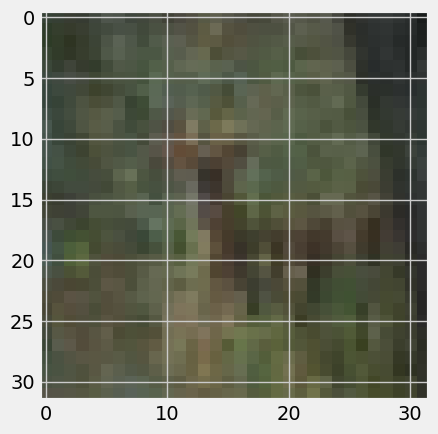

In [6]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [7]:
# Get the image label
print("The image label: ", y_train[index])

# Get the image classification
classification = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship"]
print("The image class: ", classification[y_train[index][0]])

The image label:  [4]
The image class:  Deer


In [8]:
# Convert the labels into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# Print the new lables
y_train_one_hot

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [9]:
# Print the new label of the image/picture above
print("The one hot label is: ", y_train_one_hot[index])

The one hot label is:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [10]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [11]:
# Create the models architecture
model = Sequential()

# Add the first layer
model.add(Conv2D(32, (5,5), activation="relu", input_shape=(32,32,3)))

# Add a pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a second convolution layer
model.add(Conv2D(32, (5,5), activation="relu"))

# Add another pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# Add a flatening layer
model.add(Flatten())

# Add a layer with 1000 neurons
model.add(Dense(1000, activation="relu"))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 500 neurons
model.add(Dense(500, activation="relu"))

# Add a drop out layer
model.add(Dropout(0.5))

# Add a layer with 250 neurons
model.add(Dense(250, activation="relu"))

# Add a layer with 10 neurons
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



2023-02-01 18:36:56.110063: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-01 18:36:56.110323: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-01 18:36:56.110348: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (breno): /proc/driver/nvidia/version does not exist
2023-02-01 18:36:56.110946: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Train the model
hist = model.fit(x_train, y_train_one_hot, batch_size=256, epochs=10, validation_split=0.2)

Epoch 1/10


2023-02-01 18:36:56.542040: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 491520000 exceeds 10% of free system memory.


157/157 [==============================] - 19s 113ms/step - loss: 1.8210 - accuracy: 0.3142 - val_loss: 1.5241 - val_accuracy: 0.4418
Epoch 2/10
157/157 [==============================] - 18s 112ms/step - loss: 1.4361 - accuracy: 0.4741 - val_loss: 1.2864 - val_accuracy: 0.5331
Epoch 3/10
157/157 [==============================] - 18s 117ms/step - loss: 1.2845 - accuracy: 0.5362 - val_loss: 1.2030 - val_accuracy: 0.5713
Epoch 4/10
157/157 [==============================] - 18s 113ms/step - loss: 1.2019 - accuracy: 0.5700 - val_loss: 1.1406 - val_accuracy: 0.5918
Epoch 5/10
157/157 [==============================] - 18s 113ms/step - loss: 1.0999 - accuracy: 0.6101 - val_loss: 1.1422 - val_accuracy: 0.6071
Epoch 6/10
157/157 [==============================] - 17s 108ms/step - loss: 1.0132 - accuracy: 0.6403 - val_loss: 1.0075 - val_accuracy: 0.6452
Epoch 7/10
157/157 [==============================] - 17s 110ms/step - loss: 0.9410 - accuracy: 0.6671 - val_loss: 0.9641 - val_accuracy: 0.6

In [13]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 5ms/step - loss: 0.9232 - accuracy: 0.6781


0.6780999898910522

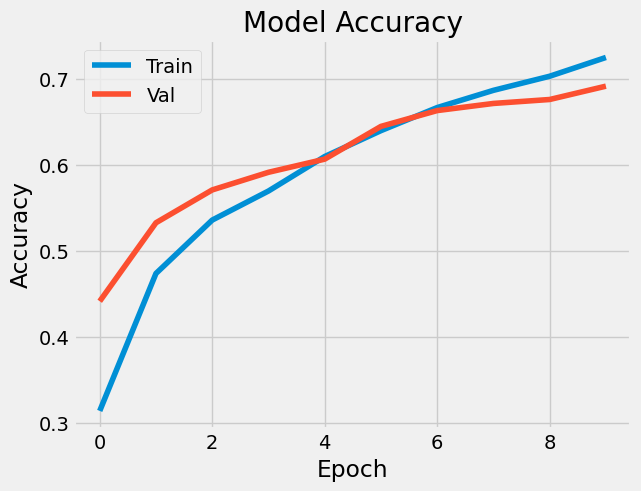

In [14]:
# Visualize the accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()


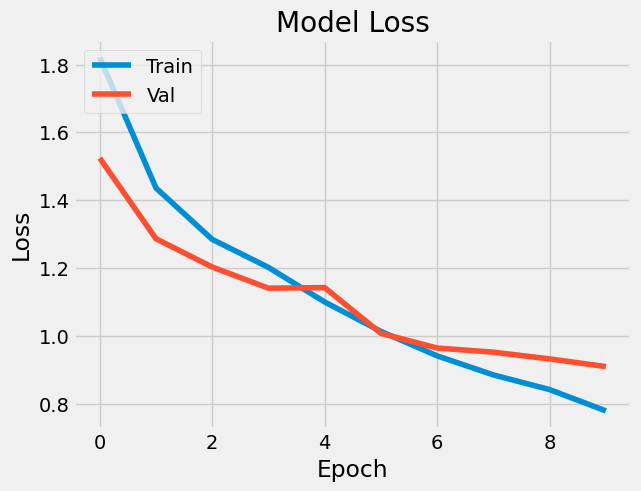

In [15]:
# Visualize the models loss
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper left")
plt.show()

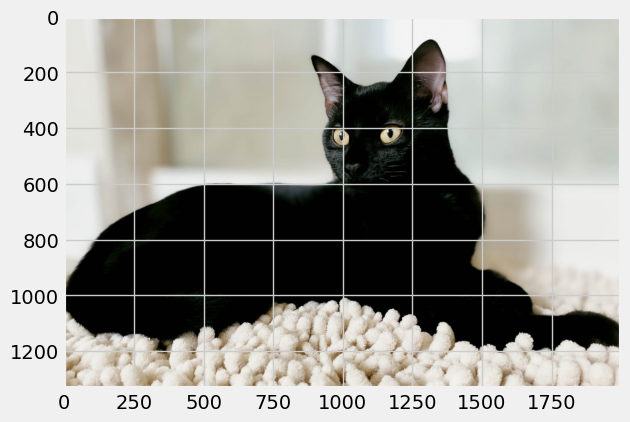

In [16]:
# Test the model with an example
new_image = plt.imread("kitty-cat.jpg")
img = plt.imshow(new_image)

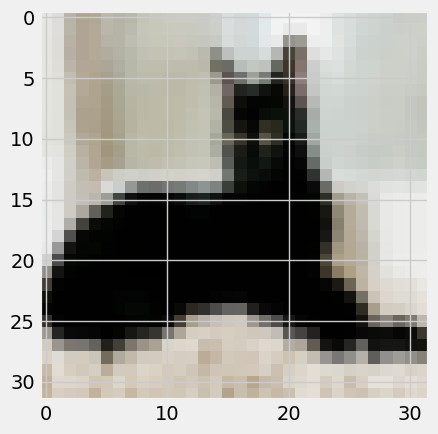

In [17]:
# Resize the image
from skimage.transform import resize

resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)



In [18]:
# Get the models predictions 
predictions = model.predict(np.array([resized_image]))

predictions

1/1 [==============================] - 0s 107ms/step


array([[3.90721768e-01, 6.30386057e-04, 3.41720134e-02, 3.50180298e-01,
        2.81317979e-02, 5.92989102e-02, 3.18429928e-04, 1.05782278e-01,
        1.84223875e-02, 1.23417955e-02]], dtype=float32)

In [19]:
# Sort the predictions from least to greatests
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
    for j in range(10):
        if x[0][list_index[i]] > x[0][list_index[j]]:
            tmp = list_index[i]
            list_index[i] = list_index[j]
            list_index[j] = tmp

# Show the sorted labels in order
print(list_index)

[0, 3, 7, 5, 2, 4, 8, 9, 1, 6]


In [20]:
# Print the top 5 most predictions
for i in range(5):
    print(classification[list_index[i]], ":", round(predictions[0][list_index[i]] * 100, 2), "%")

Airplane : 39.07 %
Cat : 35.02 %
Horse : 10.58 %
Dog : 5.93 %
Bird : 3.42 %
